In [1]:
import numpy as np, basic, local, curvedsky as cs, healpy as hp, maptools
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
nside = 512
deg2rad = np.pi/180.
npix = hp.nside2npix(nside)
pixel_theta, pixel_phi = hp.pix2ang(nside, np.arange(npix))
surveys = ['euclid','lsst','cib','litebird','cmbs4']
mask = {}

In [3]:
params = local.analysis()

In [4]:
# load the LiteBIRD FG mask which is based on G60 mask + additional masks
G60 = hp.ud_grade(hp.read_map(params.wind['PR2'],field=2),nside)
mask['litebird'] = G60*hp.ud_grade(hp.read_map(params.wind['FG']),nside) # G60 is multiplied so that nside upgrade artifacts are reduced 

Mask is based on Fig.6 of https://iopscience.iop.org/article/10.3847/1538-4365/aa96b0

In [5]:
# Euclid
mask_euclid_base = np.ones(npix)
mask_euclid_base[np.abs(pixel_theta-np.pi/2.)<15.*deg2rad] = 0.
mask['euclid'] = maptools.change_coord(mask_euclid_base, ['E','G'])
mask['euclid'][np.abs(pixel_theta-np.pi/2.)<25.*deg2rad] = 0.

In [6]:
# LSST
mask_lsst_base = np.ones(npix)
mask_lsst_base[np.abs(pixel_theta-np.pi/2.)<25.*deg2rad] = 0.
mask_lsst_cart = maptools.change_coord(mask_lsst_base, ['G','C'])
mask_lsst_cart[pixel_theta<np.pi/2.] = 0.
mask_lsst_cart[pixel_theta>np.pi/2.+60.*deg2rad] = 0.
mask['lsst'] = maptools.change_coord(mask_lsst_cart, ['C','G'])

In [7]:
# CIB
mask['cib'] = mask['litebird']

Mask for S4: https://cmb-s4.uchicago.edu/wiki/images/Update_on_Modulated_High_cadence_LAT_survey_strategies_from_Chile_20200910.pdf

In [8]:
# CMB-S4
mask_s4_base = mask['cib']
#mask_s4_base = np.ones(npix)
mask_s4_cart = maptools.change_coord(mask_s4_base, ['G','C'])
mask_s4_cart[pixel_theta<np.pi/2.-20.*deg2rad] = 0.
mask_s4_cart[pixel_theta>np.pi/2.+60.*deg2rad] = 0.
mask['cmbs4'] = maptools.change_coord(mask_s4_cart, ['C','G'])

In [9]:
for survey in surveys:
    print(np.average(mask[survey]))
print(np.average((1.-mask['cmbs4'])*mask['litebird']))

0.4042491912841797
0.2542908986409505
0.4832326260705789
0.4832326260705789
0.3041892300049464
0.1793409829697339


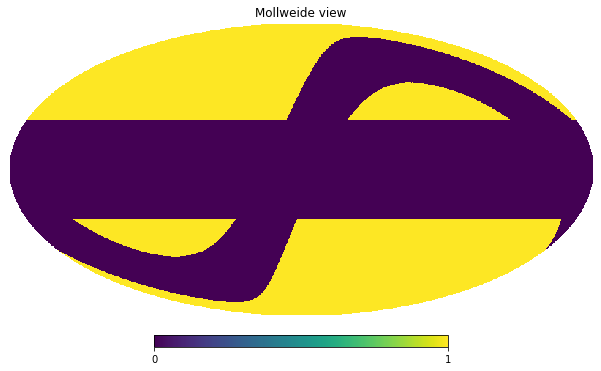

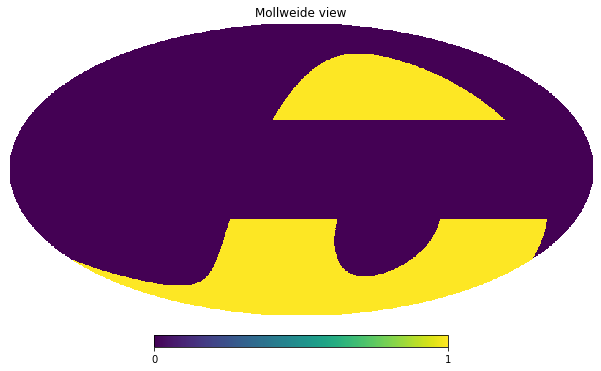

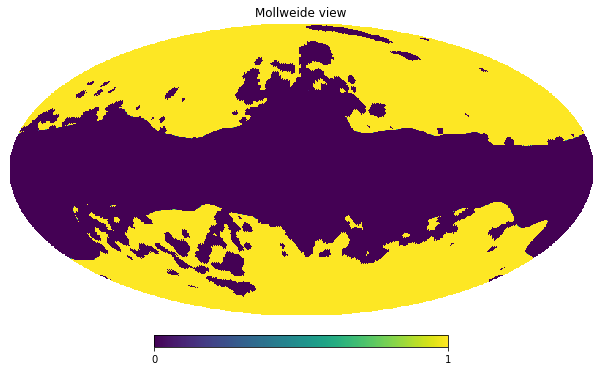

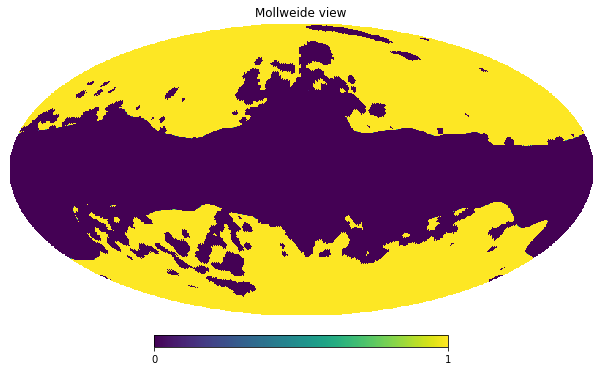

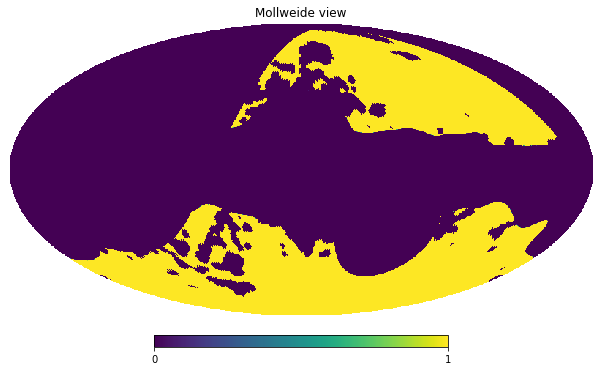

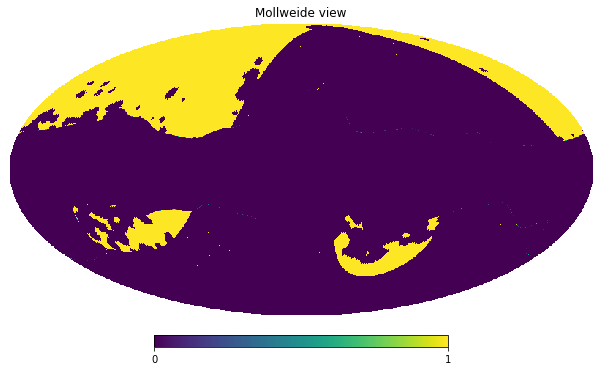

In [10]:
for survey in surveys:
    hp.mollview(mask[survey])
hp.mollview((1.-mask['cmbs4'])*mask['litebird'])

In [11]:
for survey in surveys: hp.write_map(params.wind[survey],mask[survey],overwrite=True)